# Perceptron implementation

This code demonstrates basic implementation of a perceptron using NumPy and Pandas packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import *

#print(help(generate_data))
#print(help(get_weighted_sum))
#print(help(sigmoid))

In [2]:
n_features = 3
m_examples = 15
data = generate_data(m_examples, n_features, seed=29)
print('Features and labels matrix:\n---------------------------\n')
print(data, '\n\n---------------------------')
X = data.drop(columns=['targets']).values
Y = data['targets'].values
print(f'Number of features: {X.shape[1]}')
print(f'Number of training examples: {X.shape[0]}')

Features and labels matrix:
---------------------------

          x0        x1        x2  targets
0   0.050047  0.506322  0.519234        1
1   0.265203  0.129222  0.020731        1
2   0.393828  0.380229  0.023452        1
3   0.238212  0.788106  0.617595        1
4   0.982793  0.861112  0.631429        1
5   0.186492  0.841894  0.421253        1
6   0.028407  0.952240  0.943834        0
7   0.321769  0.493433  0.272774        0
8   0.760770  0.971630  0.608703        1
9   0.613694  0.231440  0.268094        0
10  0.381394  0.568859  0.732517        1
11  0.047114  0.561463  0.966119        0
12  0.218823  0.417570  0.043238        1
13  0.792898  0.160876  0.658430        1
14  0.236390  0.945161  0.873438        0 

---------------------------
Number of features: 3
Number of training examples: 15


In [3]:
seed_init=None
weights, bias = network_init(n_features, seed=seed_init)
print('Initial network parameters:')
for i in range(len(weights)):
    print(f'w{i} = {weights[i]}')
print(f'b = {bias}')

Initial network parameters:
w0 = 0.4657972181899743
w1 = 0.390469796030658
w2 = 0.9852720966466995
b = 0


# Forward propagation

In this section, forward propagation through the perceptron is performed 

In [4]:
def forward_prop(X, weights, bias, threshold=0.5):
    weighted_sums = []
    sigmoids = []
    Y_hat = []
    for i in range(m_examples):
        example = X[i,:]
        weighted_sum = get_weighted_sum(example, weights, bias)
        weighted_sums.append(weighted_sum)
        sigm = sigmoid(weighted_sum)
        sigmoids.append(sigm)
        if sigm > threshold:
            y_hat = 1
        else:
            y_hat = 0
        Y_hat.append(y_hat)
    return Y_hat, weighted_sums, sigmoids

Y_hat, weighted_sums, sigmoids = forward_prop(X, weights, bias)
initial_pass = pd.DataFrame({'weighted_sum':weighted_sums, 'Y':Y, 'Y_hat':Y_hat, 'sigmoid':sigmoids,})
acc_init = (initial_pass['Y'] == initial_pass['Y_hat']).mean()
print(f'Initial forward propagation results (acc={acc_init:.2f}):\n---------------------------\n')
print(initial_pass)

Initial forward propagation results (acc=0.67):
---------------------------

    weighted_sum  Y  Y_hat   sigmoid
0       0.732602  1      1  0.675376
1       0.194414  1      1  0.548451
2       0.355018  1      1  0.587834
3       1.027190  1      1  0.736371
4       1.416150  1      1  0.804734
5       0.830651  1      1  0.696493
6       1.314986  0      1  0.788346
7       0.611306  0      1  0.648239
8       1.333495  1      1  0.791418
9       0.640373  0      1  0.654838
10      1.121503  1      1  0.754267
11      1.193070  0      1  0.767290
12      0.307576  1      1  0.576294
13      1.080880  1      1  0.746661
14      1.339741  0      1  0.792447


## Cross-entropy loss

In [5]:
def cross_entropy(Y, sigmoids):
    cost = []
    for i in range(len(Y)):
        y = Y[i]
        sigmoid = sigmoids[i]
        cross_entropy_loss = -(y*np.log10(sigmoid) + (1-y)*np.log10(1-sigmoid))
        cost.append(cross_entropy_loss)
    return cost
cross_entropy_cost = cross_entropy(Y, sigmoids)

initial_pass_with_cost = initial_pass.copy()
initial_pass_with_cost.drop(columns=['weighted_sum'], inplace=True)
initial_pass_with_cost['c-e loss'] = cross_entropy_cost
print(initial_pass_with_cost)

    Y  Y_hat   sigmoid  c-e loss
0   1      1  0.675376  0.170454
1   1      1  0.548451  0.260862
2   1      1  0.587834  0.230745
3   1      1  0.736371  0.132904
4   1      1  0.804734  0.094348
5   1      1  0.696493  0.157084
6   0      1  0.788346  0.674374
7   0      1  0.648239  0.453752
8   1      1  0.791418  0.101594
9   0      1  0.654838  0.461977
10  1      1  0.754267  0.122475
11  0      1  0.767290  0.633184
12  1      1  0.576294  0.239356
13  1      1  0.746661  0.126877
14  0      1  0.792447  0.682872


## Network training

This training algorithm updates weights and bias after each pass through the training data. It means, that after each training example, weights and bias are updated.

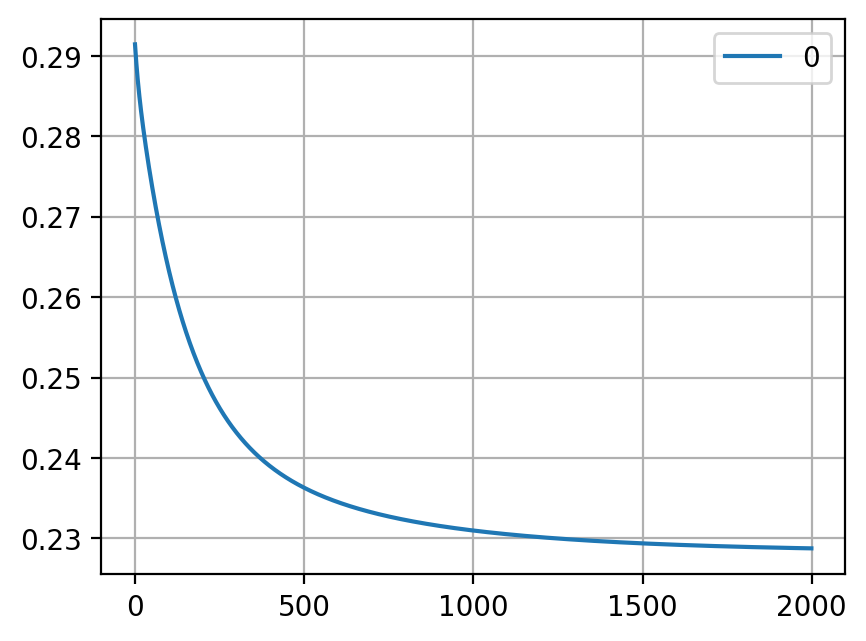

In [6]:
learning_rate = 0.1
epochs = 2000

def cross_entropy_loss(y, y_hat):
    return -(y*np.log10(y_hat) + (1-y)*np.log10(1-y_hat))

def update_weights(weights, alpha, target, prediction, feature):
    return [w + alpha*(target-prediction)*x for x, w in zip(feature, weights)]

def update_bias(bias, alpha, y, y_hat):
    return bias + alpha*(y-y_hat)
        
def train_model(X, Y, alpha=0.01, n_epoch=100):
    W, b = network_init(n_features, seed=seed_init)
    epoch_cost = []
    for e in range(n_epoch):
        m = X.shape[0]
        individual_loss = []
        for i in range(m):
            x = X[i]
            y = Y[i]
            w_sum = get_weighted_sum(x, W, b)
            y_hat = sigmoid(w_sum)
            loss = cross_entropy_loss(y, y_hat)
            individual_loss.append(loss)
            # gradient descent
            W = update_weights(W, alpha, y, y_hat, x)
            b = update_bias(b, alpha, Y[i], y_hat)
        average_cost = sum(individual_loss)/len(individual_loss)
        epoch_cost.append(average_cost)
    return W, b, epoch_cost
        
final_weights, final_bias, epoch_cost = train_model(X, Y, n_epoch=epochs)

training_data = pd.DataFrame(epoch_cost)
training_data_plot = training_data.plot(kind="line", grid=True)
training_data_plot;

In [7]:
Y_hat_final, weighted_sums_final, _ = forward_prop(X, final_weights, final_bias)
final_pass = pd.DataFrame({'weighted_sum':weighted_sums_final, 'Y':Y, 'Y_hat':Y_hat_final})
acc_final = (final_pass['Y'] == final_pass['Y_hat']).mean()
print(f'Final forward propagation results (acc={acc_final:.2f}):\n---------------------------\n')
print(final_pass)

Final forward propagation results (acc=0.80):
---------------------------

    weighted_sum  Y  Y_hat
0      -0.020373  1      0
1       1.533280  1      1
2       2.067355  1      1
3       0.403925  1      1
4       2.131760  1      1
5       0.905898  1      1
6      -0.851957  0      0
7       1.296436  0      1
8       1.801463  1      1
9       1.714637  0      1
10      0.180882  1      1
11     -1.261399  0      0
12      1.648874  1      1
13      0.926695  1      1
14     -0.182376  0      0
